# PHYS 243 Final Project

In [4]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

## 1-Neural Networks

In [5]:
nn_df = pd.read_csv("train_set.txt")
nn_df.head()

,16.263398281940148,13.29920590463558,r
0,0.775408,23.986692,r
1,29.170503,-3.287474,r
2,6.739044,-28.033329,r
3,3.216100,22.013695,r
4,47.374906,7.925541,g


### Data Cleaning and Preprocessing

In [6]:
# Add column names

nn_df.columns = ["X1", "X2", "Class"]
nn_df.head()

,X1,X2,Class
0,0.775408,23.986692,r
1,29.170503,-3.287474,r
2,6.739044,-28.033329,r
3,3.216100,22.013695,r
4,47.374906,7.925541,g


In [7]:
# Create and add new feature columns (X3, X4, X5)

nn_df["X3"] = nn_df["X1"]**2
nn_df["X4"] = nn_df["X2"]**2
nn_df["X5"] = nn_df["X1"] * nn_df["X2"]

# Reorder columns
nn_df = nn_df[["X1", "X2", "X3", "X4", "X5", "Class"]]
nn_df.head()

,X1,X2,X3,X4,X5,Class
0,0.775408,23.986692,0.601257,575.361405,18.599466,r
1,29.170503,-3.287474,850.918251,10.807487,-95.897279,r
2,6.739044,-28.033329,45.414707,785.867535,-188.917824,r
3,3.216100,22.013695,10.343297,484.602776,70.798239,r
4,47.374906,7.925541,2244.381691,62.814197,375.471748,g


In [8]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nn_df[["X1", "X2", "X3", "X4", "X5"]] = scaler.fit_transform(nn_df[["X1", "X2", "X3", "X4", "X5"]])
nn_df.head()

,X1,X2,X3,X4,X5,Class
0,0.010670,1.220504,-0.797023,0.454172,0.042570,r
1,1.510480,-0.231514,1.095179,-0.703876,-0.325935,r
2,0.325666,-1.548931,-0.697300,0.885975,-0.625319,r
3,0.139586,1.115466,-0.775345,0.268002,0.210570,r
4,2.472024,0.365443,4.196041,-0.597197,1.191154,g


In [9]:
# Replace the class labels with integers
nn_df["Class"] = nn_df["Class"].replace({"r": 0, "g": 1, "b": 2})
nn_df["Class"].unique()

array([0, 1, 2], dtype=int64)

### Model training with Keras

In [52]:
# split dataset based on inputs required for each question

input_1 = nn_df[["X3", "X4"]]
input_2 = nn_df[["X3","X5"]]
input_3 = nn_df[["X3","X4", "X5"]]
input_4 = nn_df[["X1","X2","X3","X4","X5"]]

output = nn_df["Class"]

In [ ]:
# Define function that take features as inputs to the neural network
# Since the network must be ran for each question, created a function that can be reused for each input
# Implemented L2 regularization and dropout layers to reduce overfitting

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

def split_data(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test



def neural_network(X,y):

    X_train, X_test, y_train, y_test = split_data(X, y)

    model = keras.Sequential([
        layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],),
        kernel_regularizer=regularizers.l2(0.01)),  
        layers.Dropout(0.3),  

        layers.Dense(16, activation="relu", 
        kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        
        layers.Dense(3, activation="softmax") 
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return test_loss, test_acc


In [ ]:
# Created a list consisteing of inputs required for each question
# Iterated through the list, running each input through the neural network

inputs = [input_1, input_2, input_3, input_4]
evaluation_results = []

for index, item in enumerate(inputs):
    loss, accuracy = neural_network(item, output)

    loss = f"{loss:.4f}"
    accuracy = f"{accuracy:.4f}"

    evaluation_results.append({"input": f"Input {index}", "accuracy": accuracy , "loss": loss})

evaluation_results


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2013 - loss: 1.3471 - val_accuracy: 0.7226 - val_loss: 1.2415
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5878 - loss: 1.2518 - val_accuracy: 0.8467 - val_loss: 1.1638
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 1.1708 - val_accuracy: 0.8832 - val_loss: 1.0973
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 1.0948 - val_accuracy: 0.8832 - val_loss: 1.0289
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8786 - loss: 1.0208 - val_accuracy: 0.8832 - val_loss: 0.9550
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8824 - loss: 0.9389 - val_accuracy: 0.8832 - val_loss: 0.8718
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.8301 - val_accuracy: 0.8759 - val_loss: 0.7841
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8934 - loss: 0.7563 - val_accuracy: 0.8759 - val_loss

[{'input': 'Input 0', 'accuracy': '1.0000', 'loss': '0.1712'},
 {'input': 'Input 1', 'accuracy': '0.8540', 'loss': '0.4342'},
 {'input': 'Input 2', 'accuracy': '1.0000', 'loss': '0.1726'},
 {'input': 'Input 3', 'accuracy': '0.8832', 'loss': '0.2712'}]

## 2 - Twitter Sentiment Analysis

In [106]:
train_df = pd.read_csv('twitter_training.csv')
test_df = pd.read_csv('twitter_validation.csv')

### Data Cleaning/ Preprocessing

In [107]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [108]:
test_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [109]:
train_df.duplicated().sum()

2700

In [110]:
test_df.duplicated().sum()

0

In [111]:
train_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [112]:
test_df.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [113]:
train_df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [114]:
test_df.isna().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

##### Add new column names to both training and testing datasets

In [115]:
# Set new column names for both training and validation datasets
column_names = ["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"]

train_df.columns = column_names
test_df.columns = column_names

In [116]:
train_df.head(2)

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [117]:
test_df.head(2)

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [118]:
# filled NA rows under the Tweet_Content column as empty strings
train_df['Tweet_Content'].fillna('', inplace=True)
train_df.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [119]:
train_df.shape

(74681, 4)

In [120]:
test_df.shape

(999, 4)

Issue: Both testing and validation datasets are missing a column header row. Additionally, the training dataset has 2700 duplicated rows

##### Removed duplicates from training dataset
- Note: Although the "Tweet_ID" column does not have unique values per row, it is not relevant in modeling since we often leave out unique identifiers out (left as is)

In [121]:
train_df.duplicated().sum()

2700

In [122]:
train_df.drop_duplicates(inplace=True)

In [123]:
train_df.duplicated().sum()

0

In [124]:
train_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [125]:
train_df.shape

(71981, 4)

##### Change "Irrelevant" to "Neutral" for the Sentiment column

In [126]:
train_df['Sentiment'].value_counts()

Sentiment
Negative      21787
Positive      19810
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

In [127]:
test_df['Sentiment'].value_counts()

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

In [128]:
# Replacing the "Irrelevant" sentiment with "Neutral" in the training dataset
train_df.loc[train_df["Sentiment"] == "Irrelevant", "Sentiment"] = "Neutral"

In [129]:
train_df['Sentiment'].value_counts()

Sentiment
Neutral     30384
Negative    21787
Positive    19810
Name: count, dtype: int64

In [130]:
test_df.loc[test_df["Sentiment"] == "Irrelevant", "Sentiment"] = "Neutral"

In [131]:
test_df['Sentiment'].value_counts()

Sentiment
Neutral     456
Positive    277
Negative    266
Name: count, dtype: int64

##### Text cleaning, Tokenization, Lemmatization, and removing stop words

In [132]:
train_df["Tweet_Content"]

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: Tweet_Content, Length: 71981, dtype: object

In [133]:
print(train_df["Tweet_Content"].info())
print(test_df["Tweet_Content"].info())

<class 'pandas.core.series.Series'>
Index: 71981 entries, 0 to 74680
Series name: Tweet_Content
Non-Null Count  Dtype 
--------------  ----- 
71981 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 999 entries, 0 to 998
Series name: Tweet_Content
Non-Null Count  Dtype 
--------------  ----- 
999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [134]:
# Set datatype to string
train_df["Tweet_Content"].astype(str)
test_df["Tweet_Content"].astype(str)

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
994    ⭐️ Toronto is the arts and culture capital of ...
995    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Today sucked so it’s time to drink wine n play...
997    Bought a fraction of Microsoft today. Small wins.
998    Johnson & Johnson to stop selling talc baby po...
Name: Tweet_Content, Length: 999, dtype: object

In [135]:
# Removed special characters and numbers
import re
train_df['Tweet_Content'] = train_df['Tweet_Content'].apply(lambda x: re.sub(r'\d+', '', x))  
train_df['Tweet_Content'] = train_df['Tweet_Content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

test_df['Tweet_Content'] = test_df['Tweet_Content'].apply(lambda x: re.sub(r'\d+', '', x))  
test_df['Tweet_Content'] = test_df['Tweet_Content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))  

In [136]:
# Removing punctuation
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

train_df["Tweet_Content"] = train_df["Tweet_Content"].apply(remove_punctuation)
test_df["Tweet_Content"] = test_df["Tweet_Content"].apply(remove_punctuation)

In [137]:
train_df["Tweet_Content"].head()

0    I am coming to the borders and I will kill you...
1    im getting on borderlands and i will kill you all
2    im coming on borderlands and i will murder you...
3    im getting on borderlands  and i will murder y...
4    im getting into borderlands and i can murder y...
Name: Tweet_Content, dtype: object

In [138]:
test_df["Tweet_Content"].head()

0    BBC News  Amazon boss Jeff Bezos rejects claim...
1    Microsoft Why do I pay for WORD when it functi...
2    CSGO matchmaking is so full of closet hacking ...
3    Now the President is slapping Americans in the...
4    Hi EAHelp Ive had Madeleine McCann in my cella...
Name: Tweet_Content, dtype: object

In [139]:
# Install nltk packages
import nltk
nltk.download('punkt')        
nltk.download('wordnet')       
nltk.download('omw-1.4')       
nltk.download('stopwords')     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\reala\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
# Text vectorization (bag of words)
# lowercased all words
# Tokenize, vectorize, lemmatize, and remove stop words from the dataset
# Create a new vectorized dataset

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text.lower())  
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return lemmatized_tokens

vectorizer = CountVectorizer(
    stop_words='english',  
    tokenizer=tokenize_and_lemmatize,  
    min_df=5,            
    max_df=0.8           
)

train_vector = vectorizer.fit_transform(train_df["Tweet_Content"])
test_vector = vectorizer.transform(test_df["Tweet_Content"])

train_vectorized = pd.DataFrame.sparse.from_spmatrix(train_vector, columns=vectorizer.get_feature_names_out())
test_vectorized = pd.DataFrame.sparse.from_spmatrix(test_vector, columns=vectorizer.get_feature_names_out())

In [141]:
train_vectorized.columns

Index(['aa', 'aaa', 'aaaahhh', 'aarogya', 'aaron', 'aarongreenberg',
       'aaronrodgers', 'ab', 'abah', 'abandon',
       ...
       'zpmbies', 'zrv', 'zsmitty', 'zuck', 'zuckerberg', 'zuckerpuck',
       'zuldazar', 'zuni', 'zxlesserevilxz', 'zylofonfm'],
      dtype='object', length=13203)

In [142]:
test_vectorized.columns

Index(['aa', 'aaa', 'aaaahhh', 'aarogya', 'aaron', 'aarongreenberg',
       'aaronrodgers', 'ab', 'abah', 'abandon',
       ...
       'zpmbies', 'zrv', 'zsmitty', 'zuck', 'zuckerberg', 'zuckerpuck',
       'zuldazar', 'zuni', 'zxlesserevilxz', 'zylofonfm'],
      dtype='object', length=13203)

In [143]:
# Concat vectorized training dataframe with original dataset
# Reset index to account for the dropped rows

train_df = pd.concat([train_df["Sentiment"].reset_index(drop=True), train_vectorized.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df["Sentiment"].reset_index(drop=True), test_vectorized.reset_index(drop=True)], axis=1)

In [144]:
train_df.head()

,Sentiment,aa,aaa,aaaahhh,aarogya,aaron,aarongreenberg,aaronrodgers,ab,abah,...,zpmbies,zrv,zsmitty,zuck,zuckerberg,zuckerpuck,zuldazar,zuni,zxlesserevilxz,zylofonfm
0,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
test_df.head()

,Sentiment,aa,aaa,aaaahhh,aarogya,aaron,aarongreenberg,aaronrodgers,ab,abah,...,zpmbies,zrv,zsmitty,zuck,zuckerberg,zuckerpuck,zuldazar,zuni,zxlesserevilxz,zylofonfm
0,Neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
train_df.isna().sum()

Sentiment             0
aa                False
aaa               False
aaaahhh           False
aarogya           False
                  ...  
zuckerpuck        False
zuldazar          False
zuni              False
zxlesserevilxz    False
zylofonfm         False
Length: 13204, dtype: Sparse[int64, False]

In [147]:
test_df.isna().sum()

Sentiment             0
aa                False
aaa               False
aaaahhh           False
aarogya           False
                  ...  
zuckerpuck        False
zuldazar          False
zuni              False
zxlesserevilxz    False
zylofonfm         False
Length: 13204, dtype: Sparse[int64, False]

### Data Analysis

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Distribution of Sentiments

In [149]:
train_df['Sentiment'].value_counts()

Sentiment
Neutral     30384
Negative    21787
Positive    19810
Name: count, dtype: int64

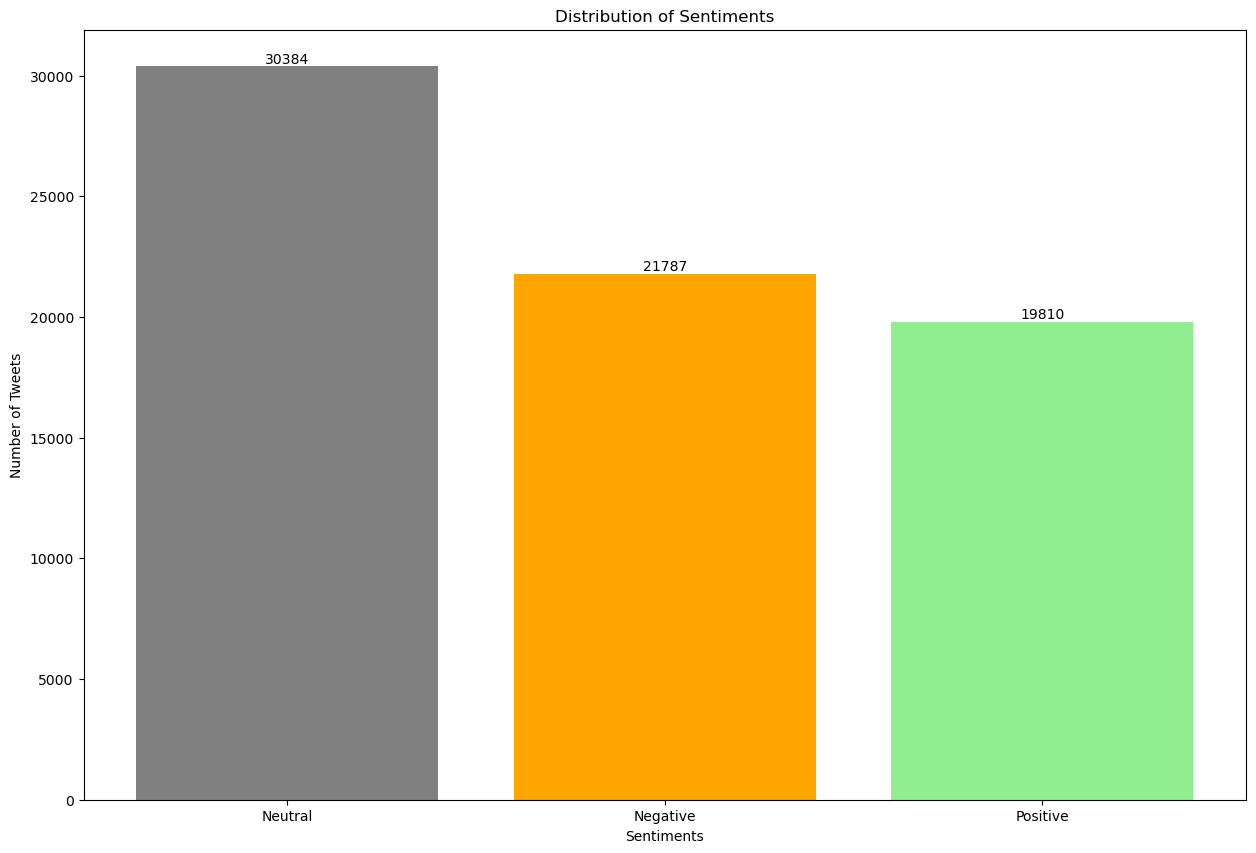

In [150]:
# Barplot showing the distribution of Sentiments
plt.figure(figsize=(15, 10))
barplot = plt.bar(train_df['Sentiment'].value_counts().index, train_df['Sentiment'].value_counts().values, color=['grey', 'orange', 'lightgreen'])

plt.title("Distribution of Sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Number of Tweets")
plt.bar_label(barplot, label_type='edge')
plt.show()

In [151]:
# Identified the top 20 words with the highest frequency

word_frequencies = train_df.drop(columns=['Sentiment']).sum()
top_words = word_frequencies.sort_values(ascending=False).head(20)
print(f'Top 20 words with the highest frequency: \n{top_words}')

Top 20 words with the highest frequency: 
game       10229
just        6572
wa          5351
like        4874
im          4818
ha          3664
play        3537
good        3473
time        3428
love        3213
really      3209
new         3166
u           2918
people      2884
johnson     2862
shit        2710
dont        2623
got         2511
best        2451
player      2365
dtype: Sparse[int64, 0]


### Model Training and Testing
- Logistic Regression, Naive Bayes, SVM, Random Forest

In [152]:
# Replace Sentiment values with numerical values
train_df["Sentiment"].replace({"Neutral": 0, "Negative": 1, "Positive": 2}, inplace=True)
test_df["Sentiment"].replace({"Neutral": 0, "Negative": 1, "Positive": 2}, inplace=True)
train_df["Sentiment"].value_counts()

Sentiment
0    30384
1    21787
2    19810
Name: count, dtype: int64

In [153]:
# Split dataset into features and targets
X = train_df.drop("Sentiment", axis=1)
y = train_df["Sentiment"]

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57584, 13203)
(14397, 13203)
(57584,)
(14397,)


##### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, multi_class='auto',random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [157]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 2, 2, 1], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6114
           1       0.82      0.80      0.81      4298
           2       0.80      0.76      0.78      3985

    accuracy                           0.80     14397
   macro avg       0.80      0.80      0.80     14397
weighted avg       0.80      0.80      0.80     14397

Accuracy score: 0.8019031742724179


##### Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [160]:
y_pred = rf.predict(X_test)
y_pred

array([2, 0, 0, ..., 2, 2, 1], dtype=int64)

In [161]:
print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6114
           1       0.92      0.90      0.91      4298
           2       0.91      0.87      0.89      3985

    accuracy                           0.90     14397
   macro avg       0.90      0.90      0.90     14397
weighted avg       0.90      0.90      0.90     14397

Accuracy score: 0.8019031742724179


##### Support Vector Machine (SVM)

In [162]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

LinearSVC(random_state=42)

In [163]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, ..., 2, 2, 1], dtype=int64)

In [164]:
print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6114
           1       0.83      0.82      0.82      4298
           2       0.80      0.78      0.79      3985

    accuracy                           0.82     14397
   macro avg       0.82      0.81      0.82     14397
weighted avg       0.82      0.82      0.82     14397

Accuracy score: 0.8019031742724179


##### Native Bayes (Bernoulli)

In [165]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [166]:
y_pred = nb.predict(X_test)
y_pred

array([1, 1, 2, ..., 2, 2, 1], dtype=int64)

In [167]:
print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      6114
           1       0.74      0.73      0.74      4298
           2       0.62      0.81      0.70      3985

    accuracy                           0.72     14397
   macro avg       0.72      0.73      0.72     14397
weighted avg       0.73      0.72      0.72     14397

Accuracy score: 0.8019031742724179
